In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import autorootcwd
import os
import json
import pandas as pd

In [8]:
DIR = 'results/hop_lengths'
experiments = os.listdir(DIR)

rows = []
errored = []

for experiment in experiments:
    # Format of filename is lr-search_scheduler_lr
    hop_length = int(experiment.split('_')[2])
    with open(f'{DIR}/{experiment}/val_metrics.json') as f:
        data = json.load(f)
    rows.append({
        'hop_length': hop_length,
        'accuracy': data['mean']['acc'],
        'root': data['mean']['root'],
        'majmin': data['mean']['majmin'],
        'third': data['mean']['third'],
        'seventh': data['mean']['seventh'],
        'mirex': data['mean']['mirex'],
        'class_wise_acc_mean': data['class_wise']['acc']['mean'],
        'class_wise_acc_median': data['class_wise']['acc']['median'],
    })

df = pd.DataFrame(rows)

In [9]:
df.sort_values('hop_length', ascending=True, inplace=True)
df

,hop_length,accuracy,root,majmin,third,seventh,mirex,class_wise_acc_mean,class_wise_acc_median
1,512,60.141423,78.319782,75.529662,74.820560,62.414807,80.016373,19.843201,1.576547
2,1024,60.243062,78.673329,75.846596,75.174649,62.499265,79.627499,20.131053,3.861682
4,2048,60.309516,78.478603,75.924263,75.245391,62.553001,79.556565,20.354321,2.610756
0,4096,59.964596,78.123842,75.753843,75.045297,62.225724,79.171530,19.293156,1.083215
5,8192,57.928411,76.242298,73.636831,72.915225,60.139910,79.292266,18.099513,1.012840
3,16384,53.321201,71.697730,68.615441,67.993350,55.406955,77.877249,14.952144,0.000000


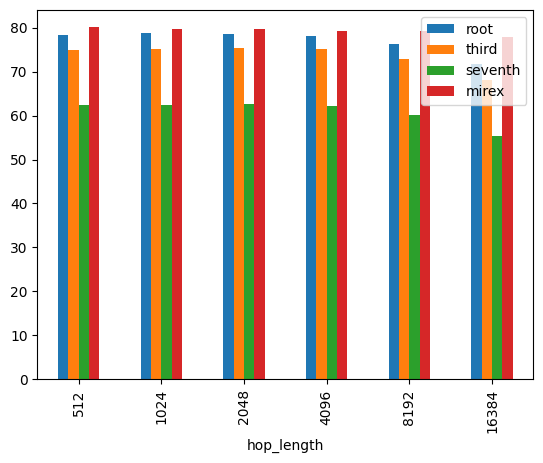

In [ ]:
# Plot hop length vs root, third, seventh, mirex and class_wice_acc_mean on the same plot as a bar chart
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
df.plot(x='hop_length', y=['root', 'third', 'seventh', 'mirex'], kind='bar', ax=ax)

plt.show()

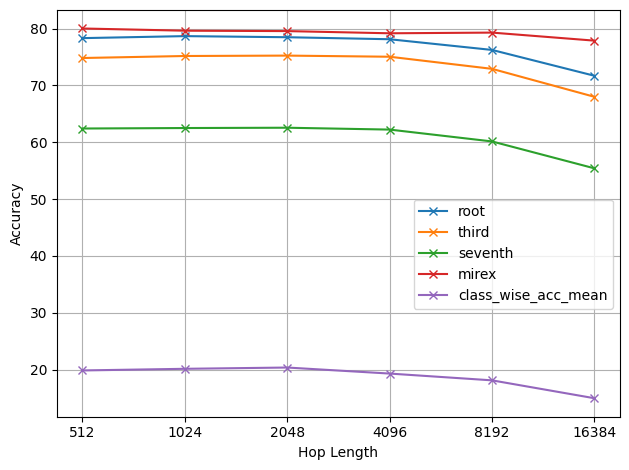

In [12]:
# Plot hop length vs root, third, seventh, mirex and class_wice_acc_mean on the same plot as a line chart
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
df.plot(x='hop_length', y=['root', 'third', 'seventh', 'mirex', 'class_wise_acc_mean'], kind='line', ax=ax, marker='x')

# Set y-axis to log base 2


# Set xticks to be the hop lengths
plt.xscale('log', base=2)
plt.xticks(df['hop_length'])
ax.xaxis.set_major_formatter(plt.ScalarFormatter())

ax.set_xlabel('Hop Length')
ax.set_ylabel('Accuracy')

# Grid lines
plt.grid(True)

# Set legend location
plt.legend(loc='center right', bbox_to_anchor=(1.0, 0.4))
plt.tight_layout()
plt.savefig('thesis/figures/hop_length_vs_accuracy.png', dpi=100, bbox_inches='tight')

plt.show()